In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.4 MB/s eta 0:00:00


In [14]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
order_density = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'order_density')
delivery_urgency = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'delivery_urgency')
driver_load = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'driver_load')
traffic_conditions = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'traffic_conditions')
profit_delivery = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'profit_delivery')
orders_number = ctrl.Consequent(np.arange(0, 101, 1), 'orders_number')
delivery_priority = ctrl.Consequent(np.arange(0, 4.1, 0.1), 'delivery_priority')

order_density['low'] = fuzz.trimf(order_density.universe, [0, 0, 5])
order_density['medium'] = fuzz.trimf(order_density.universe, [4, 6, 8])
order_density['high'] = fuzz.trimf(order_density.universe, [7, 9, 10])

delivery_urgency['low'] = fuzz.trimf(delivery_urgency.universe, [0, 0, 5])
delivery_urgency['medium'] = fuzz.trimf(delivery_urgency.universe, [4, 6, 8])
delivery_urgency['high'] = fuzz.trimf(delivery_urgency.universe, [7, 9, 10])

driver_load['low'] = fuzz.trimf(driver_load.universe, [0, 0, 5])
driver_load['medium'] = fuzz.trimf(driver_load.universe, [4, 6, 8])
driver_load['high'] = fuzz.trimf(driver_load.universe, [7, 10, 10])

traffic_conditions['low'] = fuzz.trimf(traffic_conditions.universe, [0, 0, 5])
traffic_conditions['medium'] = fuzz.trimf(traffic_conditions.universe, [4, 6, 8])
traffic_conditions['high'] = fuzz.trimf(traffic_conditions.universe, [7, 9, 10])

profit_delivery['low'] = fuzz.trimf(profit_delivery.universe, [0, 0, 5])
profit_delivery['medium'] = fuzz.trimf(profit_delivery.universe, [4, 5, 8])
profit_delivery['high'] = fuzz.trimf(profit_delivery.universe, [7, 10, 10])

orders_number['few'] = fuzz.trimf(orders_number.universe, [0, 20, 40])
orders_number['some'] = fuzz.trimf(orders_number.universe, [30, 50, 75])
orders_number['many'] = fuzz.trimf(orders_number.universe, [70, 100, 100])

delivery_priority['low'] = fuzz.trimf(delivery_priority.universe, [0, 0, 2])
delivery_priority['medium'] = fuzz.trimf(delivery_priority.universe, [1.5, 2, 3])
delivery_priority['high'] = fuzz.trimf(delivery_priority.universe, [2.5, 3, 4])

In [ ]:
order_density.view()
delivery_urgency.view()
driver_load.view()
traffic_conditions.view()
profit_delivery.view()
orders_number.view()
delivery_priority.view()

In [20]:
rule1 = ctrl.Rule(order_density['high'] & driver_load['low'] & traffic_conditions['low'], orders_number['many'])
rule2 = ctrl.Rule(order_density['medium'] & traffic_conditions['high'] & delivery_urgency['medium'], orders_number['some'])
rule3 = ctrl.Rule(driver_load['high'] & order_density['high'] & profit_delivery['medium'], orders_number['some'])
rule4 = ctrl.Rule(order_density['low'] & delivery_urgency['high'] & traffic_conditions['medium'], orders_number['some'])
rule5 = ctrl.Rule(profit_delivery['high'] & delivery_urgency['high'] & traffic_conditions['high'], orders_number['some'])
rule6 = ctrl.Rule(delivery_urgency['high'] & profit_delivery['high'], delivery_priority['high'])
rule7 = ctrl.Rule(delivery_urgency['medium'] & traffic_conditions['medium'], delivery_priority['medium'])
rule8 = ctrl.Rule(delivery_urgency['low'] & order_density['high'] & profit_delivery['low'], delivery_priority['low'])

Số lượng đơn hàng cần kết hợp: 88.33333333333333
Mức độ ưu tiên giao hàng: 0.9037037037037038


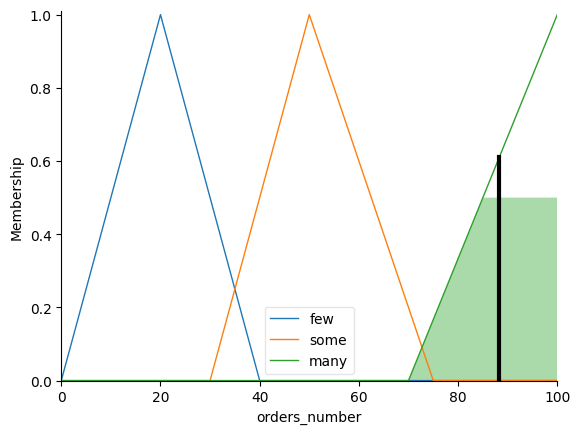

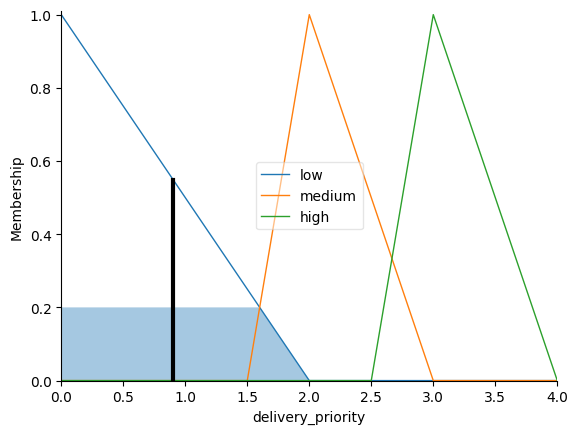

In [22]:
fuzzy_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
fuzzy_sim = ctrl.ControlSystemSimulation(fuzzy_system)
fuzzy_sim.input['order_density'] = 8
fuzzy_sim.input['delivery_urgency'] = 4
fuzzy_sim.input['driver_load'] = 2
fuzzy_sim.input['traffic_conditions'] = 2
fuzzy_sim.input['profit_delivery'] = 4
fuzzy_sim.compute()
print(f"Số lượng đơn hàng cần kết hợp: {fuzzy_sim.output['orders_number']}")
print(f"Mức độ ưu tiên giao hàng: {fuzzy_sim.output['delivery_priority']}")
orders_number.view(sim=fuzzy_sim)
delivery_priority.view(sim=fuzzy_sim)
